# Network Analysis

This notebook will show you how to analyze networks and visualize their structure.  In particular, we will analyze  social networks where nodes are people and a link represents an organizations which two people belong to.  

For those of you interested in the code, the notebook uses the [networkx](https://networkx.github.io) library to store the network structure, and the [matplotlib](https://matplotlib.org) library to visualize the results.

The following cell contains some predefined functions to process networks. Please make sure you have run this cell before you run other cells in this notebook.

First, let's download the data for this assignment.

In [2]:
#!wget 'https://raw.githubusercontent.com/khider/INF549/master/Homework%20Assignments/Homework%205/Social_Network_Analysis/Revolution.txt' --no-check-certificate
#!wget 'https://raw.githubusercontent.com/khider/INF549/master/Homework%20Assignments/Homework%205/Social_Network_Analysis/HighSchoolClubs.txt' --no-check-certificate

In [3]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (10,10)

fname = 'Revolution.txt'

def loadDataset(filename):
    if not filename:
        filename=input('Please Enter Your Dataset:')
    return filename

def loadOrganization(filename):
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',')[1:] for entry in data[1:]]
        return features,values

def Organization_Visualization(filename):
    plt.clf()
    #filename=input('Please Enter the File Name:')
    features,values=loadOrganization(filename)
    g=nx.Graph()
    weightedNodes={}
    for value in values:
        lst=[]
        for index,node in enumerate(value):
            if node=='1':
                lst.append(features[index])
        for i in itertools.combinations(lst,2):
            weightedNodes[i]=weightedNodes.get(i,0) + 1
    for nodes,weights in weightedNodes.items():
        #print nodes,weights
        g.add_edge(*nodes,weight=weights*0.4)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))  
    edges = g.edges()
    weights = [g[u][v]['weight'] for u,v in edges]
    nx.draw(g,pos,with_labels = True,node_color="#E69F00",width=weights,font_size=8,\
            font_color='#0F0C82',edge_color="#A9A9A9")
    filename=filename[:-4]+'_organization.png'
    plt.savefig(filename,dpi=300)
    plt.show()   

def loadPeople(filename):
    Organization_People={}
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',') for entry in data[1:]]
        for i in range(len(features)):
            persons=[]
            for value in values:
                if value[i+1]=='1':
                    persons.append(value[0])
            Organization_People[features[i]]=persons
        return Organization_People

def People_Visualization(filename):
    plt.clf()
    #filename=input('Please Enter the File Name:')
    Organization_People=loadPeople(dataset)
    g=nx.Graph()
    for organization in Organization_People.keys():
        for i in itertools.combinations(Organization_People[organization],2):
            g.add_edge(*i)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))    
    nx.draw(g,pos=pos,with_labels = True,width=0.05,linewidths=0.2,\
            node_color="#E69F00",node_size=4,font_size=4,font_color='#0F0C82',\
            edge_color="#A9A9A9")
    filename=filename[:-4]+'_people.png'
    plt.savefig(filename,dpi=300) 
    plt.show()

def loadHead(filename):
    import pandas as pd
    #dataset=input('Please Enter Your Dataset:')
    df=pd.read_csv(dataset)
    with pd.option_context('display.max_columns', None):
        display(df.head())

## Exploring the data
Run the following cell  and input the 'Revolution.txt' file located in the 'Social Network Analysis' folder. Every row represents a person in the American revolution. Every column represents an organization. If there is a '1' in a specific column, this means a person was a member of that organization. We will analyze the social network from two perspectives: the organization perspective and the people perspective. 

The two social networks analysis functions are very general and not limited to represent the relationsips among people and clubs. It can represent relationships amony any entities and the organizations that the entities belong to.

In [4]:
dataset=loadDataset(fname)

In [5]:
loadHead(dataset)

,Unnamed: 0,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
0,Adams.John,0,0,1,1,0,0,0
1,Adams.Samuel,0,0,1,1,0,1,1
2,Allen.Dr,0,0,1,0,0,0,0
3,Appleton.Nathaniel,0,0,1,0,0,1,0
4,Ash.Gilbert,1,0,0,0,0,0,0


## Organization Visualization##
In the organization network, the visualization will display the relationships among various organizations. The more members two organizations shared, the thicker the edge between them would be.   

The following cell visualizes the organization network. When you are prompted to input the data, use one of the two datasets provided in the 'Social Network Analysis' folder. 

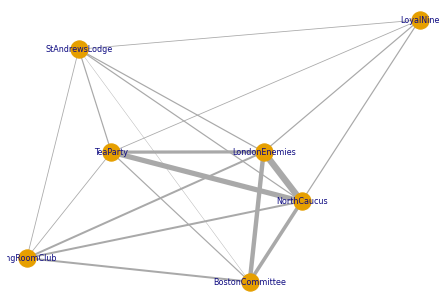

In [6]:
Organization_Visualization(dataset)

**Tips: if you cannot see the picture very clearly, it has been saved at the same folder of this notebook.**

## People Visualization##
In the people network, the visualization will display the relationships among various people. If two people were in the same club, there would be an edge between them. A thicker edge represents that two persons had a lot of common organizations.  

The following cell generate a visualization of the people in your network data.  When you are prompted to input the data, use one of the two datasets provided in the 'Social Network Analysis' folder. You can choose a different dataset from  the previous question.

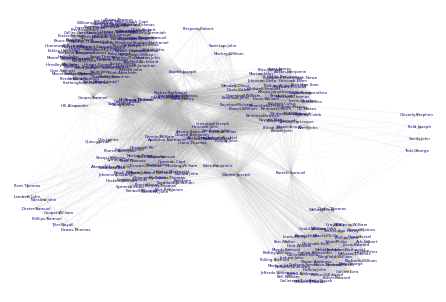

In [7]:
People_Visualization(dataset)

**Tips: if you cannot see the picture very clearly, it has been saved at the same folder of this notebook.**